In [133]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz, export_graphviz
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import metrics
from sklearn import externals
from IPython.display import Image
import graphviz
import pydotplus
from io import StringIO
import warnings
warnings.filterwarnings("ignore")

# 1 - Business Problem

A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 


# 2 - Data collection and description

In [134]:
df = pd.read_csv("D:\\Harsha\\Data sciences\\Assignments\\Assignment_14_Decision Trees\\Company_Data.csv")

In [135]:
df1 = df.copy()

In [136]:
data = df.copy()

In [137]:
df1.head(10)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
5,10.81,124,113,13,501,72,Bad,78,16,No,Yes
6,6.63,115,105,0,45,108,Medium,71,15,Yes,No
7,11.85,136,81,15,425,120,Good,67,10,Yes,Yes
8,6.54,132,110,0,108,124,Medium,76,10,No,No
9,4.69,132,113,0,131,124,Medium,76,17,No,Yes


In [138]:
df1.tail(10)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
390,5.47,108,75,9,61,111,Medium,67,12,Yes,Yes
391,6.10,153,63,0,49,124,Bad,56,16,Yes,No
392,4.53,129,42,13,315,130,Bad,34,13,Yes,Yes
393,5.57,109,51,10,26,120,Medium,30,17,No,Yes
394,5.35,130,58,19,366,139,Bad,33,16,Yes,Yes
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes
399,9.71,134,37,0,27,120,Good,49,16,Yes,Yes


In [139]:
df1.shape

(400, 11)

In [140]:
df1.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [141]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [142]:
df1.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [143]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,400.0,7.496325,2.824115,0.0,5.39,7.49,9.32,16.27
CompPrice,400.0,124.975000,15.334512,77.0,115.00,125.00,135.00,175.00
Income,400.0,68.657500,27.986037,21.0,42.75,69.00,91.00,120.00
Advertising,400.0,6.635000,6.650364,0.0,0.00,5.00,12.00,29.00
Population,400.0,264.840000,147.376436,10.0,139.00,272.00,398.50,509.00
Price,400.0,115.795000,23.676664,24.0,100.00,117.00,131.00,191.00
Age,400.0,53.322500,16.200297,25.0,39.75,54.50,66.00,80.00
Education,400.0,13.900000,2.620528,10.0,12.00,14.00,16.00,18.00


### 2.1 Outlier Check

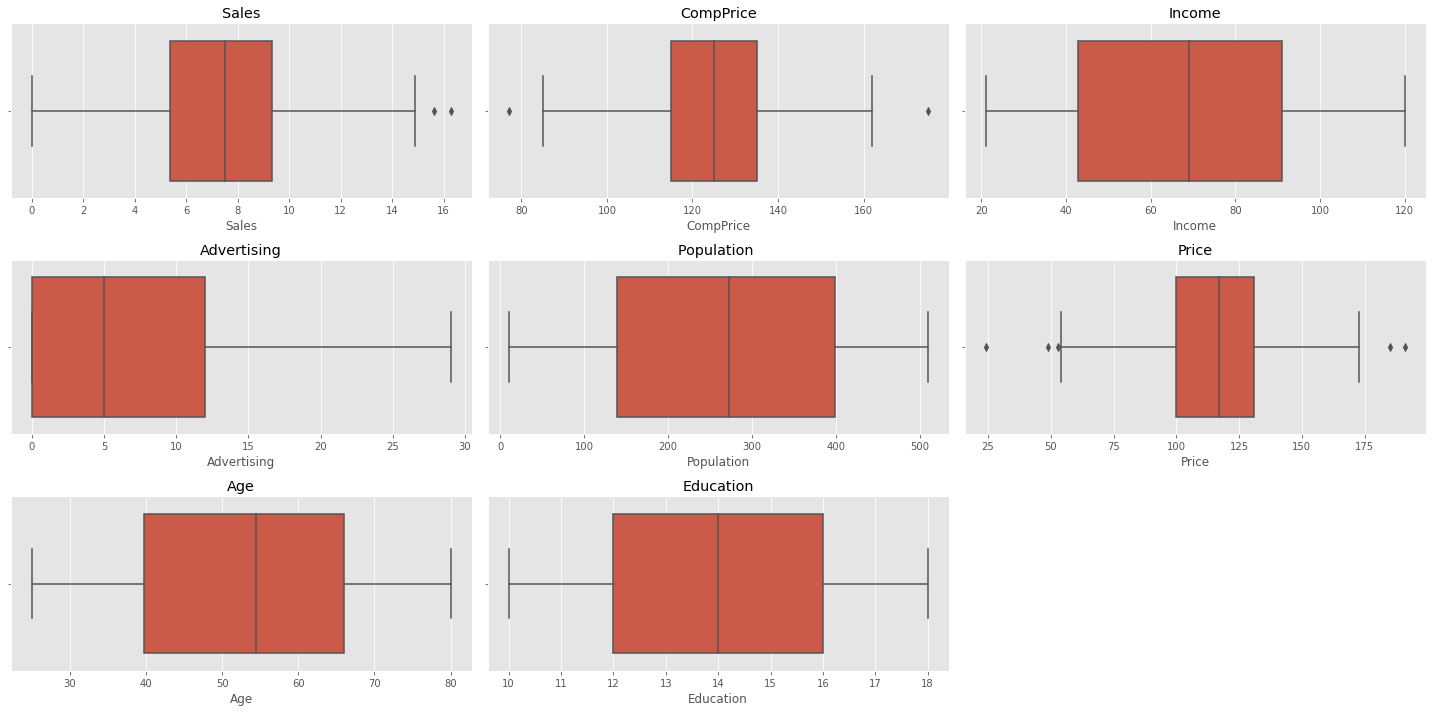

In [144]:
plt.style.use('ggplot')
plt.figure(figsize=(20,10))

plt.subplot(3,3,1)
sns.boxplot(x='Sales', data = df1)
plt.title('Sales')

plt.subplot(3,3,2)
sns.boxplot(x='CompPrice', data = df1)
plt.title('CompPrice')

plt.subplot(3,3,3)
sns.boxplot(x='Income', data = df1)
plt.title('Income')

plt.subplot(3,3,4)
sns.boxplot(x='Advertising', data = df1)
plt.title('Advertising')

plt.subplot(3,3,5)
sns.boxplot(x='Population', data = df1)
plt.title('Population ')

plt.subplot(3,3,6)
sns.boxplot(x='Price', data = df1)
plt.title('Price')

plt.subplot(3,3,7)
sns.boxplot(x='Age', data = df1)
plt.title('Age')

plt.subplot(3,3,8)
sns.boxplot(x='Education', data = df1)
plt.title('Education')
plt.tight_layout()

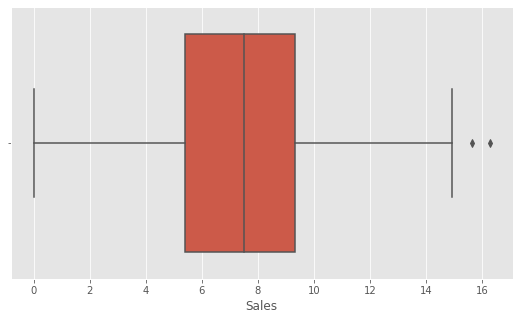

In [145]:
ax = sns.boxplot(df1['Sales'])

### The sales data has 2 outlier instances

Skew: 0.18556036318721578
Kurtosis: -0.08087736743346197


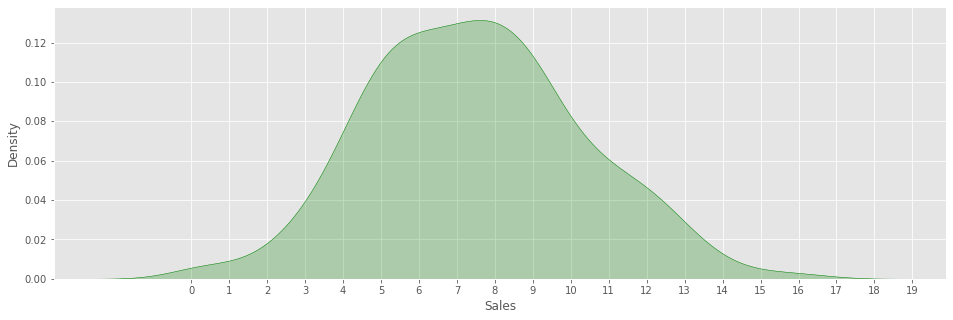

In [146]:
plt.rcParams["figure.figsize"] = 9,5
plt.figure(figsize=(16,5))
print("Skew: {}".format(df1['Sales'].skew()))
print("Kurtosis: {}".format(df1['Sales'].kurtosis()))
ax = sns.kdeplot(df1['Sales'],shade=True,color='g')
plt.xticks([i for i in range(0,20,1)])
plt.show()

### The data is Skwed on the right and has negative Kurtosis

In [147]:
obj_colum = df1.select_dtypes(include='object').columns.tolist()

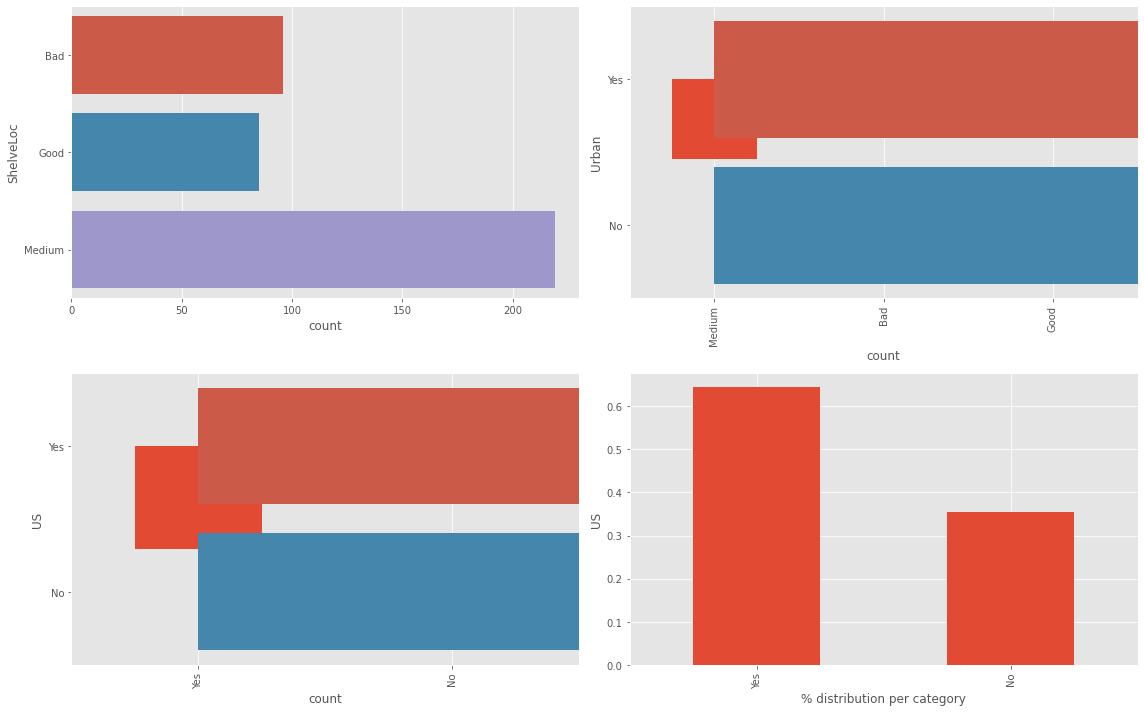

In [148]:
plt.figure(figsize=(16,10))
for i,col in enumerate(obj_colum,1):
    plt.subplot(2,2,i)
    sns.countplot(data=df1,y=col)
    plt.subplot(2,2,i+1)
    df1[col].value_counts(normalize=True).plot.bar()
    plt.ylabel(col)
    plt.xlabel('% distribution per category')
plt.tight_layout()
plt.show()

In [149]:
num_columns = df1.select_dtypes(exclude='object').columns.tolist()

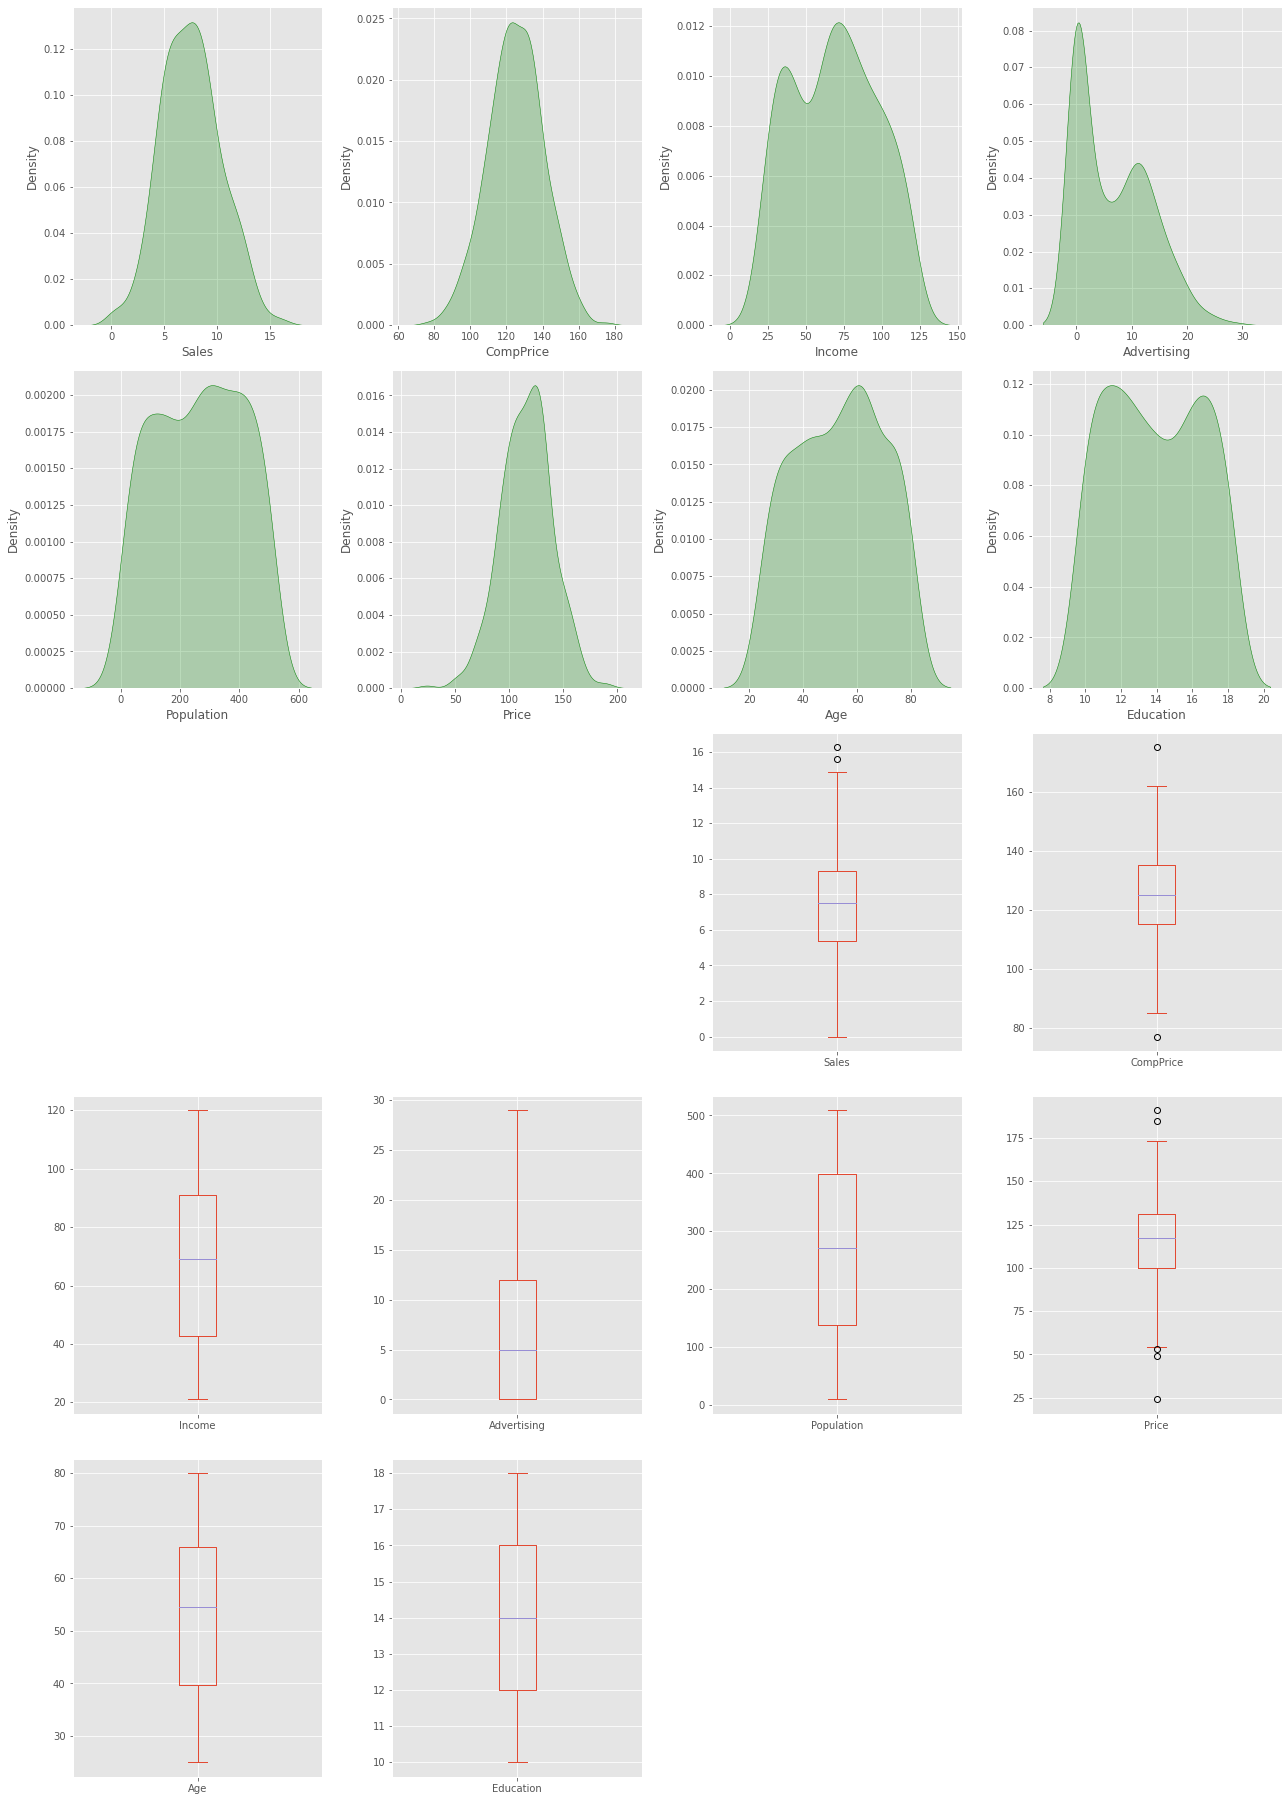

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
skewness,0.185560,-0.042755,0.049444,0.639586,-0.051227,-0.125286,-0.077182,0.044007
kurtosis,-0.080877,0.041666,-1.085289,-0.545118,-1.202318,0.451885,-1.134392,-1.298332


In [150]:
plt.figure(figsize=(18,40))
for i,col in enumerate(num_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(df[col],color='g',shade=True)
    plt.subplot(8,4,i+10)
    df[col].plot.box()
plt.tight_layout() 
plt.show()
num_data = df[num_columns]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])

In [151]:
corr = df1.corr()

In [152]:
df1 = pd.get_dummies(df1, columns = ['ShelveLoc','Urban','US'])

In [153]:
corr = df1.corr()

<AxesSubplot:>

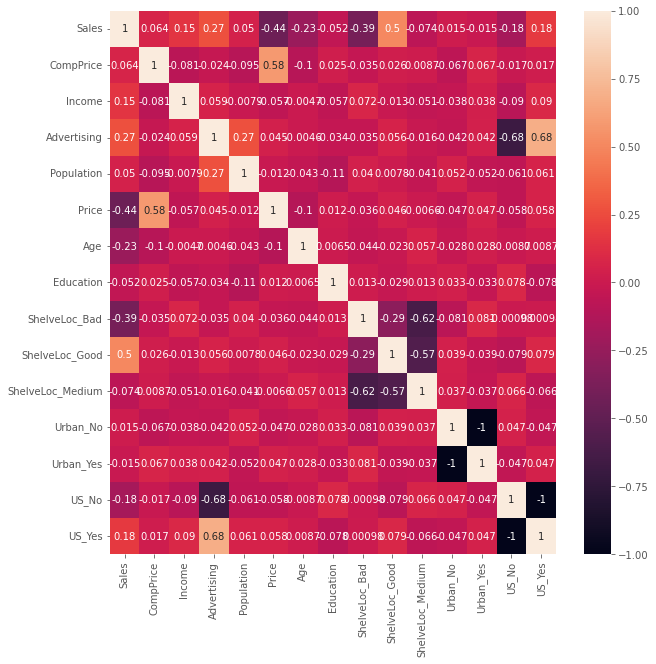

In [154]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

# 3 - Decision Tree - Model

##### Since the target variable is continuous, we create a class of the value based on the mean <= 7.5 == "Small" and > 7.5== "large"

In [155]:
data['sales_status'] = '<7.5'

In [156]:
data.loc[data['Sales'] >= 7.5 ,'sales_status'] = 'High'
data.loc[data['Sales'] < 7.5 , 'sales_status'] = 'low'
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_status
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,High
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,High
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,low
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,low
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes,High
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes,low
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes,low
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes,low


In [157]:
data.drop('Sales' , axis = 1 , inplace= True)
data

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_status
0,138,73,11,276,120,Bad,42,17,Yes,Yes,High
1,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,113,35,10,269,80,Medium,59,12,Yes,Yes,High
3,117,100,4,466,97,Medium,55,14,Yes,Yes,low
4,141,64,3,340,128,Bad,38,13,Yes,No,low
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,Good,33,14,Yes,Yes,High
396,139,23,3,37,120,Medium,55,11,No,Yes,low
397,162,26,12,368,159,Medium,40,18,Yes,Yes,low
398,100,79,7,284,95,Bad,50,12,Yes,Yes,low


In [158]:
data['sales_status'].value_counts()

low     201
High    199
Name: sales_status, dtype: int64

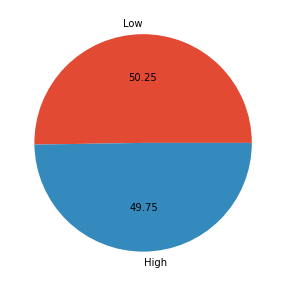

In [159]:
plt.pie(data['sales_status'].value_counts() , labels=['Low' , 'High'] , autopct='%0.2f')
plt.show()

In [160]:
label_en = LabelEncoder()
for i in range (0, data.shape[1]):
    if data.dtypes[i] == 'object':
        data[data.columns[i]] = label_en.fit_transform(data[data.columns[i]])     

In [161]:
data

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_status
0,138,73,11,276,120,0,42,17,1,1,0
1,111,48,16,260,83,1,65,10,1,1,0
2,113,35,10,269,80,2,59,12,1,1,0
3,117,100,4,466,97,2,55,14,1,1,1
4,141,64,3,340,128,0,38,13,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1,0
396,139,23,3,37,120,2,55,11,0,1,1
397,162,26,12,368,159,2,40,18,1,1,1
398,100,79,7,284,95,0,50,12,1,1,1


### 3.1 - Splitting data and building the model

In [162]:
x = data.drop('sales_status' , axis = 1)
y =data[['sales_status']]

In [163]:
x_train,x_test,y_train,y_test = train_test_split(x , y , test_size=0.2)

In [164]:
model = DecisionTreeClassifier(random_state= 40)
criterion = ['gini' , 'entropy']
max_depth = range(1,10)
param_grid = [{'criterion':criterion, 'max_depth':max_depth}]
grid = GridSearchCV(estimator = model ,param_grid = param_grid , cv=10)
grid.fit(x_train , y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=40),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': range(1, 10)}])

In [165]:
print('best_params:' , grid.best_params_)
print('best_score:' , grid.best_score_)

best_params: {'criterion': 'entropy', 'max_depth': 9}
best_score: 0.74375


#### After fine tuning, we have found that model is giving best score by using 'gini' criterion with max_depth of tree as '7'.

### 3.2 - Building the final decision tree model with the above parameters.

In [166]:
final_model = DecisionTreeClassifier(criterion='gini' , max_depth= 7 , random_state=40)
final_model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=7, random_state=40)

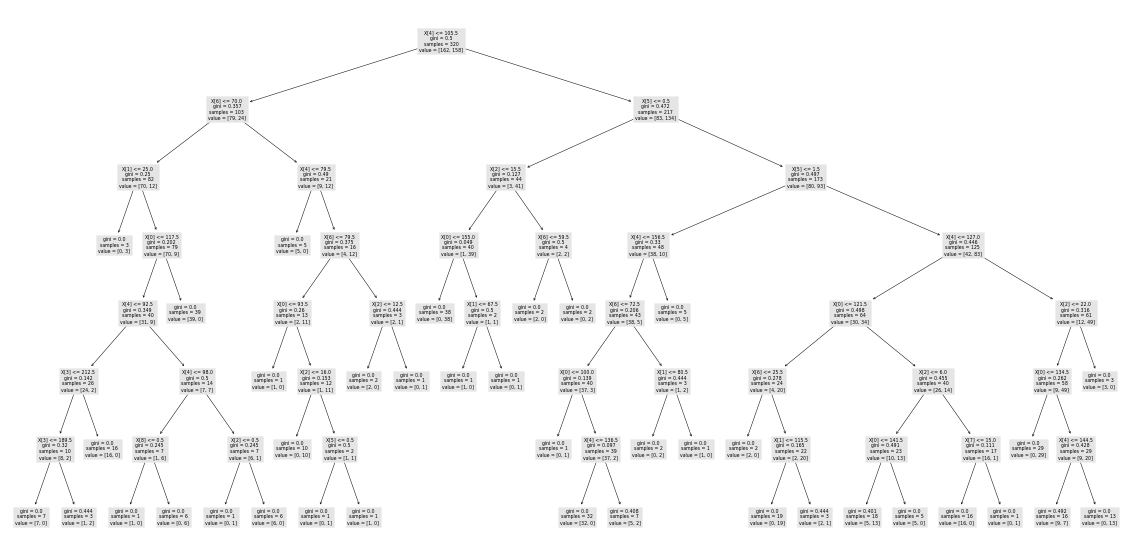

In [167]:
plt.figure(figsize=(20,10))
tree.plot_tree(final_model);

### 3.3 - Model Evaluation

In [168]:
y_train_pred = final_model.predict(x_train)
accuracy_score(y_train , y_train_pred)

0.95

In [169]:
confusion_matrix(y_train , y_train_pred)

array([[156,   6],
       [ 10, 148]], dtype=int64)

In [170]:
print(classification_report(y_train , y_train_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       162
           1       0.96      0.94      0.95       158

    accuracy                           0.95       320
   macro avg       0.95      0.95      0.95       320
weighted avg       0.95      0.95      0.95       320



### 3.4 - Model Prediction using test data

In [171]:
y_test_pred = final_model.predict(x_test)
accuracy_score(y_test , y_test_pred)

0.725

In [172]:
confusion_matrix(y_test , y_test_pred)

array([[25, 12],
       [10, 33]], dtype=int64)

In [173]:
print(classification_report(y_test , y_test_pred))

              precision    recall  f1-score   support

           0       0.71      0.68      0.69        37
           1       0.73      0.77      0.75        43

    accuracy                           0.73        80
   macro avg       0.72      0.72      0.72        80
weighted avg       0.72      0.72      0.72        80



# 4 - Conclusion

### Since the accuracy of the Training set is 0.95% we test the accuracy on the test data which is 0.72%

### As seen in the confusion matrix of Test data 58 instances are predicted correctly and 22 instances are not.

In [174]:
img = mpimg.imread("D:\\Harsha\\Data sciences\\Assignments\\Assignment_14_Decision Trees\\Company_DT.png")

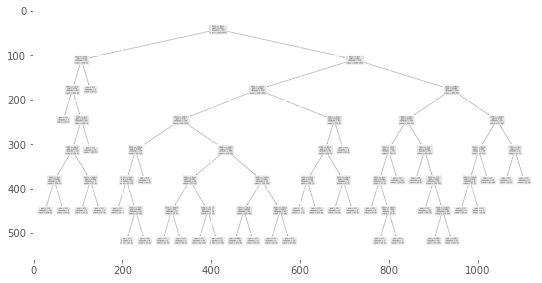

In [175]:
plt.imshow(img)

In [176]:
model.fit(x,y)

DecisionTreeClassifier(random_state=40)

In [177]:
fi = pd.DataFrame({'feature': list(x_train.columns),
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending = False)

In [178]:
fi

,feature,importance
4,Price,0.278325
5,ShelveLoc,0.156361
0,CompPrice,0.155867
2,Advertising,0.110492
1,Income,0.092357
6,Age,0.091115
3,Population,0.049419
7,Education,0.028795
8,Urban,0.022270
9,US,0.015000


### As seen in the above table Price is most important feature and price segment or attributes causes high sale.